## 1. Import libraries

In [1]:
import warnings 
warnings.filterwarnings('ignore')
import nltk
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from nltk.corpus import stopwords
from sklearn.cluster import KMeans
from tqdm import tqdm
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer


pd.options.display.max_colwidth = 1000

In [11]:
stopwords = stopwords.words('english')

In [9]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

## 2. Read data

In [3]:
reviews = pd.read_csv("./datasets/IMDB Dataset.csv")
reviews.head()

,review,sentiment
0,"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the...",positive
1,"A wonderful little production. <br /><br />The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece. <br /><br />The actors are extremely well chosen- Michael Sheen not only ""has got all the polari"" but he has all the voices down pat too! You can truly see the seamless editing guided by the references to Williams' diary entries, not only is it well worth the watching but it is a terrificly written and performed piece. A masterful production about one of the great master's of comedy and his life. <br /><br />The realism really comes home with the little things: the fantasy of the guard which, rather than use the traditional 'dream' techniques remains solid then disappears. It plays on our knowledge and our senses, particularly with the scenes concerning Orton and Halliwell and the sets (particularly of their flat with Halliwell's murals decorating every surface) are terribly well done.",positive
2,"I thought this was a wonderful way to spend time on a too hot summer weekend, sitting in the air conditioned theater and watching a light-hearted comedy. The plot is simplistic, but the dialogue is witty and the characters are likable (even the well bread suspected serial killer). While some may be disappointed when they realize this is not Match Point 2: Risk Addiction, I thought it was proof that Woody Allen is still fully in control of the style many of us have grown to love.<br /><br />This was the most I'd laughed at one of Woody's comedies in years (dare I say a decade?). While I've never been impressed with Scarlet Johanson, in this she managed to tone down her ""sexy"" image and jumped right into a average, but spirited young woman.<br /><br />This may not be the crown jewel of his career, but it was wittier than ""Devil Wears Prada"" and more interesting than ""Superman"" a great comedy to go see with friends.",positive
3,"Basically there's a family where a little boy (Jake) thinks there's a zombie in his closet & his parents are fighting all the time.<br /><br />This movie is slower than a soap opera... and suddenly, Jake decides to become Rambo and kill the zombie.<br /><br />OK, first of all when you're going to make a film you must Decide if its a thriller or a drama! As a drama the movie is watchable. Parents are divorcing & arguing like in real life. And then we have Jake with his closet which totally ruins all the film! I expected to see a BOOGEYMAN similar movie, and instead i watched a drama with some meaningless thriller spots.<br /><br />3 out of 10 just for the well playing parents & descent dialogs. As for the shots with Jake: just ignore them.",negative
4,"Petter Mattei's ""Love in the Time of Money"" is a visually stunning film to watch. Mr. Mattei offers us a vivid portrait about human relations. This is a movie that seems to be telling us what money, power and success do to people in the diffe

## 3. Preprocess data

In [4]:
reviews.shape
# (50000, 2)

import re
from sklearn.feature_extraction import text

stop_words = text.ENGLISH_STOP_WORDS

def clean_review(review, stopwords):
    html_tag = re.compile('<.*?>')
    cleaned_review = re.sub(html_tag, "", review).split()
    cleaned_review = [i for i in cleaned_review if i not in stopwords]
    return " ".join(cleaned_review)

## cleaning the review column
reviews["cleaned_review"] = reviews["review"].apply(lambda x: clean_review(x, stop_words))

In [5]:
reviews.head()

,review,sentiment,cleaned_review
0,"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the...",positive,"One reviewers mentioned watching just 1 Oz episode you'll hooked. They right, exactly happened me.The thing struck Oz brutality unflinching scenes violence, set right word GO. Trust me, faint hearted timid. This pulls punches regards drugs, sex violence. Its hardcore, classic use word.It called OZ nickname given Oswald Maximum Security State Penitentary. It focuses mainly Emerald City, experimental section prison cells glass fronts face inwards, privacy high agenda. Em City home many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish more....so scuffles, death stares, dodgy dealings shady agreements far away.I say main appeal fact goes shows wouldn't dare. Forget pretty pictures painted mainstream audiences, forget charm, forget romance...OZ doesn't mess around. The episode I saw struck nasty surreal, I couldn't say I ready it, I watched more, I developed taste Oz, got accustomed high levels graphic violence. Not just violence, injustice (crooked guards who'll sold ni..."
1,"A wonderful little production. <br /><br />The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece. <br /><br />The actors are extremely well chosen- Michael Sheen not only ""has got all the polari"" but he has all the voices down pat too! You can truly see the seamless editing guided by the references to Williams' diary entries, not only is it well worth the watching but it is a terrificly written and performed piece. A masterful production about one of the great master's of comedy and his life. <br /><br />The realism really comes home with the little things: the fantasy of the guard which, rather than use the traditional 'dream' techniques remains solid then disappears. It plays on our knowledge and our senses, particularly with the scenes concerning Orton and Halliwell and the sets (particularly of their flat with Halliwell's murals decorating every surface) are terribly well done.",positive,"A wonderful little production. The filming technique unassuming- old-time-BBC fashion gives comforting, discomforting, sense realism entire piece. The actors extremely chosen- Michael Sheen ""has got polari"" voices pat too! You truly seamless editing guided references Williams' diary entries, worth watching terrificly written performed piece. A masterful production great master's comedy life. The realism really comes home little things: fantasy guard which, use traditional 'dream' techniques remains solid disappears. It plays knowledge senses, particularly scenes concerning Orton Halliwell sets (particularly flat Halliwell's murals decorating surface) terribly done."
2,"I thought this was a wonderful way to spend time on a too hot summer weekend, sitting in the air conditioned theater and watching a light-hearted comedy. The plot is simplistic, but the dialogue is witty and the characters are likable (even the well bread s

## 4. Build model clustering

* Split train/test set

In [6]:
from sklearn.model_selection import train_test_split

## we will do the splitting using a random state to ensure same splitting every time
X_train, X_test, y_train, y_test = train_test_split(reviews.cleaned_review, 
                                                    reviews.sentiment, 
                                                    test_size = .5,
                                                    random_state = 13)

* Convert the text reviews into numerical representation

In [12]:
## maximum features to keep (based on frequency)
max_features = 5000

## stop words were already removed before
vectorizer = CountVectorizer(lowercase = True, stop_words = stopwords,
                             max_features = max_features)
                             
vectorizer.fit(X_train) 
review_vectors = vectorizer.transform(X_train) 
review_train = review_vectors.toarray() 
print(len(vectorizer.vocabulary_))
# 5000

5000


* Now, let’s directly try to cluster the data and visualize it using the usual approach:

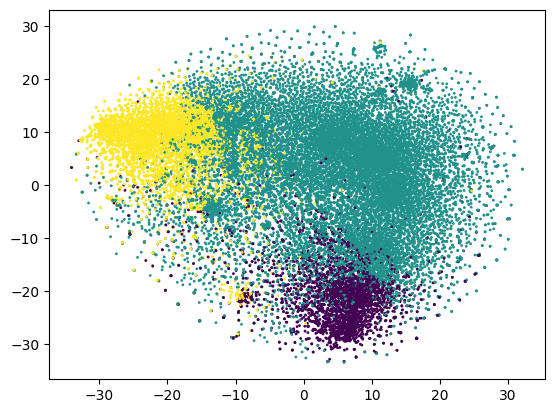

In [13]:
# arbitrary number of clusters
kmeans = KMeans(n_clusters=3, random_state=13).fit_predict(review_vectors)
tsne = TSNE(n_components=2, metric="euclidean", init="random", random_state=13).fit_transform(review_vectors)

plt.scatter(tsne[:, 0], tsne[:, 1], c=kmeans, s=1)
plt.show()


## 5. Autoencoder

* The role of the autoencoder is to try to capture the most important features and structures in the data and re-represent it in lower dimensions. We will build our autoencoder with Keras library.

* An autoencoder mainly consists of three main parts; 
    * 1) Encoder, which tries to reduce data dimensionality. 
    * 2) Code, which is the compressed representation of the data. 
    * 3) Decoder, which tries to revert the data into the original form without losing much information.

In [14]:
from keras.models import Model
from keras.layers import Dense, Input
from keras.preprocessing import sequence

* Make sure that all vectors have the same length within the data and truncate them into maximum length. But as we already used the max_features argument in CounterVectorizer, there will be no need for pad_sequences.

* Let’s construct our validation dataset that we will use to validate model performance.

In [15]:
## a subset from the test data
review_test = vectorizer.transform(X_test[:2000]).toarray()
#review_test = sequence.pad_sequences(review_test, maxlen = max_len)

* Define three layers in both encoder and decoder. Most importantly the “bottleneck” layer which will be the compressed representation of the data to be used later.

In [16]:
## define the encoder
inputs_dim = review_train.shape[1]
encoder = Input(shape = (inputs_dim, ))
e = Dense(1024, activation = "relu")(encoder)
e = Dense(512, activation = "relu")(e)
e = Dense(256, activation = "relu")(e)


## bottleneck layer
n_bottleneck = 10
## defining it with a name to extract it later
bottleneck_layer = "bottleneck_layer"
# can also be defined with an activation function, relu for instance
bottleneck = Dense(n_bottleneck, name = bottleneck_layer)(e)

## define the decoder (in reverse)
decoder = Dense(256, activation = "relu")(bottleneck)
decoder = Dense(512, activation = "relu")(decoder)
decoder = Dense(1024, activation = "relu")(decoder)


## output layer
output = Dense(inputs_dim)(decoder)
## model
model = Model(inputs = encoder, outputs = output)
model.summary()

# Model: "model"
# _________________________________________________________________
# Layer (type) Output Shape Param #
# =================================================================
# input_2 (InputLayer) [(None, 500)] 0
# _________________________________________________________________
# dense_14 (Dense) (None, 1024) 513024
# _________________________________________________________________
# dense_15 (Dense) (None, 512) 524800
# _________________________________________________________________
# dense_16 (Dense) (None, 256) 131328
# _________________________________________________________________
# bottleneck_layer (Dense) (None, 10) 2570
# _________________________________________________________________
# dense_17 (Dense) (None, 256) 2816
# _________________________________________________________________
# dense_18 (Dense) (None, 512) 131584
# _________________________________________________________________
# dense_19 (Dense) (None, 1024) 525312
# _________________________________________________________________
# dense_20 (Dense) (None, 500) 512500
# =================================================================
# Total params: 2,343,934
# Trainable params: 2,343,934
# Non-trainable params: 0
# _________________________________________________________________

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 5000)]            0         
                                                                 
 dense (Dense)               (None, 1024)              5121024   
                                                                 
 dense_1 (Dense)             (None, 512)               524800    
                                                                 
 dense_2 (Dense)             (None, 256)               131328    
                                                                 
 bottleneck_layer (Dense)    (None, 10)                2570      
                                                                 
 dense_3 (Dense)             (None, 256)               2816      
                                                                 
 dense_4 (Dense)             (None, 512)               131584

* The layer we are interest in the most is the “bottleneck_layer”. So after training the autoencoder, we will extract that layer with its trained weights to reshape our data.

In [17]:
## extracting the bottleneck layer we are interested in the most
## in case you haven't defined it as a layer on it own you can extract it by name 
#bottleneck_encoded_layer = model.get_layer(name = bottleneck_layer).output
## the model to be used after training the autoencoder to refine the data
#encoder = Model(inputs = model.input, outputs = bottleneck_encoded_layer)
# in case you defined it as a layer as we did
encoder = Model(inputs = model.input, outputs = bottleneck)

* Fit model

In [18]:
model.compile(loss = "mse", optimizer = "adam")

history = model.fit(
    review_train,
    review_train,
    batch_size = 32,
    epochs = 25,
    verbose = 1,
    validation_data = (review_test, review_test)
)

# Epoch 1/25
# 782/782 [==============================] - 8s 9ms/step - loss: 0.0232 - val_loss: 0.0205
# ...
# ...
# Epoch 25/25
# 782/782 [==============================] - 6s 8ms/step - loss: 0.0152 - val_loss: 0.0176

Epoch 1/25
782/782 [==============================] - 134s 170ms/step - loss: 0.0235 - val_loss: 0.0235
Epoch 2/25
782/782 [==============================] - 139s 177ms/step - loss: 0.0227 - val_loss: 0.0232
Epoch 3/25
782/782 [==============================] - 147s 187ms/step - loss: 0.0224 - val_loss: 0.0229
Epoch 4/25
782/782 [==============================] - 134s 171ms/step - loss: 0.0221 - val_loss: 0.0228
Epoch 5/25
782/782 [==============================] - 138s 177ms/step - loss: 0.0220 - val_loss: 0.0227
Epoch 6/25
782/782 [==============================] - 140s 179ms/step - loss: 0.0219 - val_loss: 0.0226
Epoch 7/25
782/782 [==============================] - 137s 175ms/step - loss: 0.0217 - val_loss: 0.0225
Epoch 8/25
782/782 [==============================] - 130s 166ms/step - loss: 0.0216 - val_loss: 0.0224
Epoch 9/25
782/782 [==============================] - 134s 172ms/step - loss: 0.0215 - val_loss: 0.0225
Epoch 10/25
782/782 [==============================] - 139s 177m

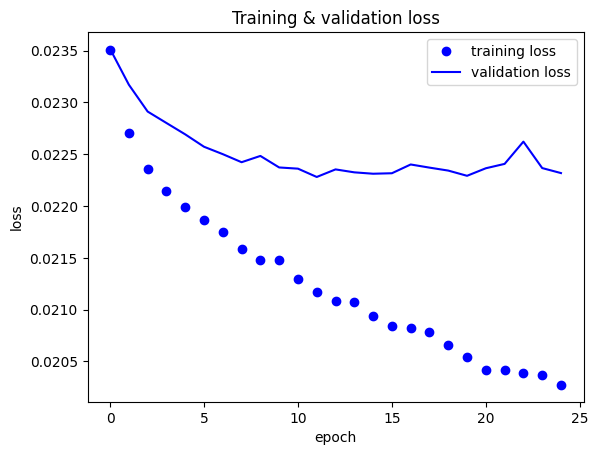

In [19]:
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(25)
plt.plot(epochs, loss_values, "bo", label = "training loss")
plt.plot(epochs, val_loss_values, "b", label = "validation loss")
plt.title("Training & validation loss")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend()
plt.show()
# plt.clf() # to clear

* The model seems to be performing well. 

In [20]:
## representing the data in lower dimensional representation or embedding
review_encoded = encoder.predict(review_train)
review_encoded.shape
# (25000, 10)

782/782 [==============================] - 4s 5ms/step


(25000, 10)

# 6. UMAP

* Perfect! We have the data encoded into 10 dimensions only. Now let’s move to the next step. The manifold learning.

* The next step is to use manifold learning to further reduce the encoded data dimensions. Autoencoders don’t take the local structure of the data into consideration, while manifold learning does. So combining them can lead to better clustering.

* We will build a UMAP model and run it upon the encoded data.

In [21]:
## install umap library use
# pip install umap-learn

import umap.umap_ as umap

review_umapped = umap.UMAP(n_components = n_bottleneck / 2, 
                           metric = "euclidean",
                           n_neighbors = 50, 
                           min_dist = 0.0,
                           random_state = 13).fit_transform(review_encoded)
review_umapped.shape
# (25000, 5)

(25000, 5)

## 7. DBSCAN / KMeans

* The last step is to use the clustering algorithm over the “umapped” data. We will use DBSCAN now, to leave it to the algorithm to decide the number of clusters.

* We will also re-use the KMeans algorithm to compare, by visualization, the clusters using the simple approach and the approach discussed here.

In [22]:
from sklearn.cluster import DBSCAN
import numpy as np
np.random.seed(13)

clusters = DBSCAN(
    min_samples = 50,
    eps = 1
).fit_predict(review_umapped)
len(set(clusters))
# 5

1

## 8. Clusters Visualization

It is time now to evaluate the performance of this approach and the quality of the clusters it produces. We will try to visualize the clusters from different angles to see the effect of the N2D approach.

TSNE will be used, again as earlier, to assist in visualizing the clusters by reducing the “review_encoded” data into 2 dimensions.

N.B. UMAP can be used again here for visualization instead of TSNE and actually it is faster.

<Axes: >

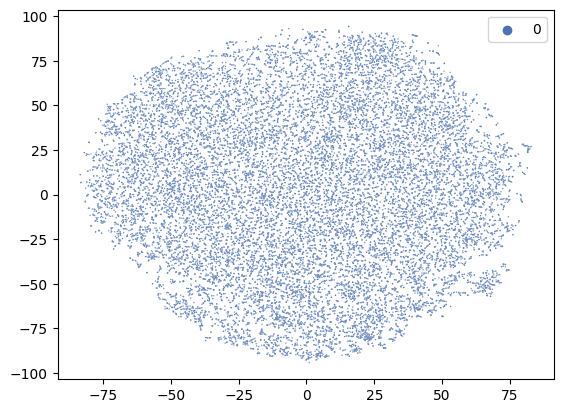

In [23]:
import seaborn as sns
tsne2 = TSNE(2, metric="euclidean", init="random", random_state=13).fit_transform(review_encoded)
sns.scatterplot(x=tsne2[:, 0], y=tsne2[:, 1], 
                hue=clusters, palette="deep",
                alpha=0.9, s=1,
                legend="full")


Now let’s try to run again the KMeans algorithm on the “UMAPped” data and see how different the quality of the clusters will be than the initial attempt.

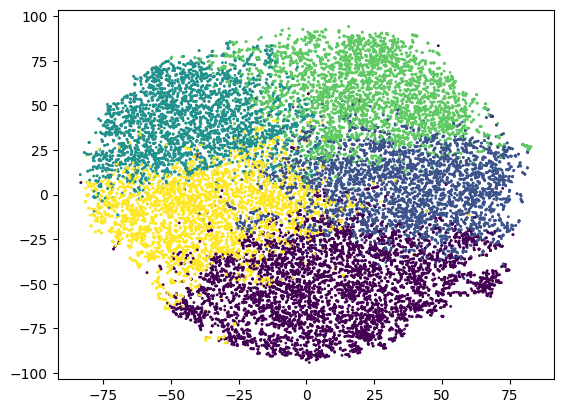

In [24]:
kmeans2 = KMeans(n_clusters = 5, random_state = 13).fit_predict(review_umapped)
plt.scatter(tsne2[:, 0], tsne2[:, 1], c = kmeans2, s = 1) 
plt.show()

A really big difference than the initial one! Clusters seem to be very well separated than before. With taking more care of data preprocessing step, better results may be obtained

Finally, out of curiousity, why not looking at how KMeans could perform on the encoded data without UMAPing it.

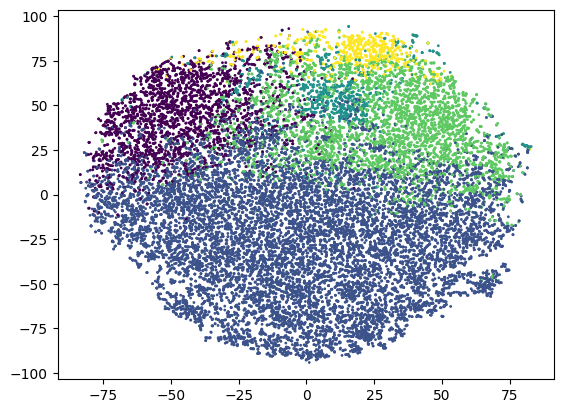

In [25]:
kmeans3 = KMeans(n_clusters = 5, random_state = 13).fit_predict(review_encoded)
plt.scatter(tsne2[:, 0], tsne2[:, 1], c = kmeans3, s = 1) 
plt.show()

## 9. Conclus

# End Notebook